# Which is the best neighbourhood in Bogota, Colombia for a new vegetarian restaurant?

## **1. Introduction/Business Problem**

Restaurants are tending to cater to vegetarians more and more every day. In the United Kingdom, a third of all meals are meatless (https://www.bbc.co.uk/news/uk-42973870). Likewise, more vegetarian products are being produced, such as the Beyond meat patty. According to a recent Gallup survey, According to Gallup, sales of plant-based food grew 8.1 percent in 2017 and exceeded 3.1 billion last year.

In Bogota, in 2019, there were close to 200 restaurants with vegetarian options(https://www.dinero.com/edicion-impresa/negocios/articulo/oferta-del-mercado-vegano-y-vegetariano-en-colombia/267318). However, truly vegetarian or vegan restaurants are limited; according to Happy Cow, a webpages which recommends these types of restaurants, there are currently only 92 exclusively vegan or vegetarian restaurants in the area. Most people who identify as vegetarians in Bogota, according to a Sodezo survey, are in their twenties or thirties (https://www.rcnradio.com/estilo-de-vida/hay-mas-de-600-millones-de-vegetarianos-en-el-mundo#:~:text=En%20Colombia%20esta%20poblaci%C3%B3n%2C%20en,los%2020%20y%2030%20a%C3%B1os.&text=El%20estudio%20revel%C3%B3%20adem%C3%A1s%20que,carne)%20y%209%20%25%20vegano). 

Bogota is ganining popularity amongst international tourists, which is one of the reasons why more vegetarian restaurants have been opening in the city. According to a study carried out by the Colombian Restaurant Association (Acodres) and the National Consulting Center (CNC), Bogota is one of the most popular destinations or restaurant owners to invest in.Here, they target their restaurants usually to upper-middle class citizens (https://www.eltiempo.com/archivo/documento/CMS-3164528).

Taking into account the reasons previously stated, this project will focus on the best location for a vegetarian restaurant, which meets the following requirements concerning the target audience: 
- A large population in the neighbourhood is in their twenties or thirties.
- The neighbourhoods GDP per capita is amongst the highest in the city. 
- People who visit that neighbourhood are interested in things which usually cluster well with vegetarianism. 

## **2. Data**
### The following data was used: 
- Demographic data (information on numer of people per age group, by borough). 
- Data on longitude and latitude for each neighbourhood, within each borough in Bogotá, available from the open data portal https://datosabiertos.bogota.gov.co/, downloaded as csv
- GDP per capita for each borough, available from the open data portal https://datosabiertos.bogota.gov.co/, downloaded as csv
- Data from Foursquare will be clustered using k-means clustering, and subsetted, keeping only clusters with vegetarian options in them. 

In [165]:
CLIENT_ID = '4O5C0ASE00QSJPU3W1G5C0FJWZHBNUK3RGWLFL21NF0PCDMK' 
CLIENT_SECRET = 'LXOVGDCRFEVZCI4MGGC5JXAQVJL4PZM2N05NLQATJSF2XUMK' 
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4O5C0ASE00QSJPU3W1G5C0FJWZHBNUK3RGWLFL21NF0PCDMK
CLIENT_SECRET:LXOVGDCRFEVZCI4MGGC5JXAQVJL4PZM2N05NLQATJSF2XUMK


In [166]:
demo = pd.read_csv('/resources/data/piramideporlocalidad.csv',sep=',')
locdf = pd.read_csv('/resources/data/georef.csv')
wealth = pd.read_csv('/resources/data/pibpercapitalocalidad.csv')

print("Demographic data loaded successfully!")
print("Location data loaded successfully!")
print("Socioeconomic data loaded successfully!")

Demographic data loaded successfully!
Location data loaded successfully!
Socioeconomic data loaded successfully!


### Load libraries

In [167]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 3. **Methodology**

Bogota is a city of 7.4 million people, so finding the right place to setup a vegetarian restaurant requires information about its population. In the data wrangling section, only specific columns for each dataframe (location, wealth and demographic data), were selected, and translated into English, so whomever reads this paper will understand the variables used. Numeric data was wrangled, removing periods in the number sequence. Demographic data before 2019 was discarded, as well as boroughs with no demographic data. All three dataframes were then merged, in order to carry out exploratory data analysis. 

Exploratory data analysis was carried out, to see which were the wealthiest boroughs. The point of this analysis was to select only boroughs were people could afford to go out to restaurants. In inferential statistical testing, I wanted to determine whether there was a difference between boroughs in the percentage of millenials, given that this group is the most interested in vegan or vegetarian lifestyles, which can also afford to go to restaurants (gen Z may be interesented, but still living at home or just starting to make a living). 

Machine learning was then used to cluster neighbourhoods within the richest boroughs, and those with the highest proportion of millenials. K-means clustering was used to do this. In order to determine the correct amount of clusters, the elbow method was used. 

### a) Data wrangling

In [168]:
# Explore at all the uploaded dataframes
print(locdf.columns)
print(wealth.columns)
print(demo.columns)

Index(['OBJECTID', 'Codigo Localidad', 'Localidad', 'Estado', 'Nombre',
       'Codigo', 'coord_x', 'coord_y'],
      dtype='object')
Index(['OBJECTID_12', 'Nombre de Localidad', 'Código de Localidad',
       'Ingreso per Cápita - Vr', 'coord_x', 'coord_y'],
      dtype='object')
Index(['Área', 'Grupos de edad', 'Hombres', 'Mujeres', 'Total', 'Año'], dtype='object')


In [169]:
# Subset necessary columns
locdf =  locdf[['Codigo Localidad','Codigo', 'Nombre' ,'coord_x', 'coord_y']]
wealth =  wealth[['Nombre de Localidad', 'Código de Localidad','Ingreso per Cápita - Vr']]

In [170]:
#Rename columns to be readable in English
locdf.rename(columns={'Codigo Localidad':'borough_ID', 'Nombre':'neighbourhood','Codigo':'neighbourhood_ID', 'coord_x':'longitude', 'coord_y': 'latitude'},inplace=True)
wealth.rename(columns={'Nombre de Localidad':'borough', 'Código de Localidad':'borough_ID', 'Ingreso per Cápita - Vr':'GDP_per_capita'},inplace=True)
demo.rename(columns={'Área':'borough', 'Grupos de edad':'age_group', 'Hombres':'men', 'Mujeres':'women', 'Total':'total', 'Año':'year'},inplace=True)

print(locdf.columns)
print(wealth.columns)
print(demo.columns)

Index(['borough_ID', 'neighbourhood_ID', 'neighbourhood', 'longitude',
       'latitude'],
      dtype='object')
Index(['borough', 'borough_ID', 'GDP_per_capita'], dtype='object')
Index(['borough', 'age_group', 'men', 'women', 'total', 'year'], dtype='object')


In [171]:
# In sociodemographic data, remove totals for the whole city and  data before 2019
indexNames = demo[ demo['borough'] == 'Bogotá' ].index
demo.drop(indexNames , inplace=True)
indexNames2 = demo[ demo['year'] < 2019 ].index
demo.drop(indexNames2 , inplace=True)
print(demo.head)

<bound method NDFrame.head of                  borough         age_group      men    women      total  year
108              Usaquén               0-4   13.529   12.798     26.327  2019
109              Usaquén               5-9   14.236   13.435     27.671  2019
110              Usaquén             10-14   14.965   14.371     29.336  2019
111              Usaquén             15-19   15.415   15.902     31.317  2019
112              Usaquén             20-24   16.949   17.700     34.649  2019
113              Usaquén             25-29   17.447   18.240     35.687  2019
114              Usaquén             30-34   17.536   18.961     36.497  2019
115              Usaquén             35-39   17.570   20.898     38.468  2019
116              Usaquén             40-44   16.576   19.520     36.096  2019
117              Usaquén             45-49   14.942   17.828     32.770  2019
118              Usaquén             50-54   14.493   17.877     32.370  2019
119              Usaquén          

In [172]:
#  In sociodemographic data, remove total population, leave only information for age group
demo['age_group'] = demo['age_group'].astype('category')
demo = demo[['borough','age_group','total']]
indexNames = demo[demo['age_group'] == 'Población total '].index
demo.drop(indexNames , inplace=True)
print(demo['age_group'].cat.categories)

Index(['0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
       '45-49', '5-9', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80 y más', 'Población total '],
      dtype='object')


In [173]:
#remove period from total
demo['total'] = demo['total'].str.replace('.', '')
demo.dtypes

borough        object
age_group    category
total          object
dtype: object

In [174]:
# In sociodemographic data, change 'total ' column type of to float
demo.loc[:, 'total'] = demo.loc[:, 'total'].astype('int')    
demo.dtypes

borough        object
age_group    category
total           int64
dtype: object

In [175]:
# Merge location and wealth data, by borough_ID
locwealth =pd.merge(locdf, wealth, on='borough_ID')

In [176]:
#Set borough as categories, to marge locwealth with demo info
locwealth['borough'] = locwealth['borough'].astype('category')
print (locwealth.dtypes)
print (locwealth['borough'].cat.categories)

# Rename borough in demo to match data in locdf
demo['borough'] = demo['borough'].astype('category')
demo['borough'] = demo['borough'].cat.rename_categories(['ANTONIO NARIÑO', 'BARRIOS UNIDOS', 'BOSA', 'CANDELARIA','CHAPINERO',
       'CIUDAD BOLIVAR', 'ENGATIVA', 'FONTIBON', 'KENNEDY', 'LOS MARTIRES',
       'PUENTE ARANDA', 'RAFAEL URIBE URIBE', 'SAN CRISTOBAL', 'SANTA FE',
       'SUBA', 'SUMAPAZ','TEUSAQUILLO', 'TUNJUELITO', 'USAQUEN', 'USME'])
print (demo['borough'].cat.categories)

borough_ID             int64
neighbourhood_ID       int64
neighbourhood         object
longitude             object
latitude              object
borough             category
GDP_per_capita       float64
dtype: object
Index(['ANTONIO NARIÑO', 'BARRIOS UNIDOS', 'BOSA', 'CHAPINERO',
       'CIUDAD BOLIVAR', 'ENGATIVA', 'FONTIBON', 'KENNEDY', 'LOS MARTIRES',
       'PUENTE ARANDA', 'RAFAEL URIBE URIBE', 'SAN CRISTOBAL', 'SANTA FE',
       'SUBA', 'TEUSAQUILLO', 'TUNJUELITO', 'USAQUEN', 'USME'],
      dtype='object')
Index(['ANTONIO NARIÑO', 'BARRIOS UNIDOS', 'BOSA', 'CANDELARIA', 'CHAPINERO',
       'CIUDAD BOLIVAR', 'ENGATIVA', 'FONTIBON', 'KENNEDY', 'LOS MARTIRES',
       'PUENTE ARANDA', 'RAFAEL URIBE URIBE', 'SAN CRISTOBAL', 'SANTA FE',
       'SUBA', 'SUMAPAZ', 'TEUSAQUILLO', 'TUNJUELITO', 'USAQUEN', 'USME'],
      dtype='object')


In [177]:
# Merge all data 
alldata =pd.merge(locwealth, demo, on='borough')
alldata.head()

,borough_ID,neighbourhood_ID,neighbourhood,longitude,latitude,borough,GDP_per_capita,age_group,total
0,1,10155,Páramo - Escuela de Caballería,"-74,02612636020883","4,67908997903364",USAQUEN,1.948544e+06,0-4,26327
1,1,10155,Páramo - Escuela de Caballería,"-74,02612636020883","4,67908997903364",USAQUEN,1.948544e+06,5-9,27671
2,1,10155,Páramo - Escuela de Caballería,"-74,02612636020883","4,67908997903364",USAQUEN,1.948544e+06,10-14,29336
3,1,10155,Páramo - Escuela de Caballería,"-74,02612636020883","4,67908997903364",USAQUEN,1.948544e+06,15-19,31317
4,1,10155,Páramo - Escuela de Caballería,"-74,02612636020883","4,67908997903364",USAQUEN,1.948544e+06,20-24,34649


### b) Exploratory data analysis

- Which boroughs have the wealthiest population?

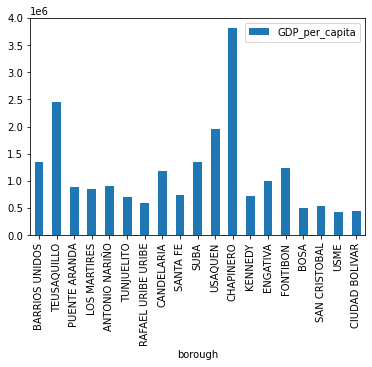

In [178]:
wealth.plot(kind='bar',x='borough',y='GDP_per_capita')
plt.show()

### c) Inferential statistical testing

- Is there a difference in proportion of millenials amongst boroughs?

In [179]:
# transform data on number of people in each category into millenials or non-millenials
minidemo = demo[['borough','age_group','total']]

cleanup_nums = {"age_group":     {"0-4": 'non-millenial', "5-9": 'non-millenial', "10-14": 'non-millenial',
                                 "15-19": 'non-millenial',"20-24": 'non-millenial',"25-29": 'millenial',
                                 "30-34": 'millenial',"35-39": 'millenial',"40-44": 'non-millenial', "45-49": 'non-millenial', "50-54": 'non-millenial',
                                 "55-59": 'non-millenial',"60-64": 'non-millenial',"65-69": 'non-millenial', "70-74": 'non-millenial',
                                 "75-79": 'non-millenial',"80 y más": 'non-millenial'}}
minidemo.replace(cleanup_nums, inplace=True)
minidemo.head()

,borough,age_group,total
108,USAQUEN,non-millenial,26327
109,USAQUEN,non-millenial,27671
110,USAQUEN,non-millenial,29336
111,USAQUEN,non-millenial,31317
112,USAQUEN,non-millenial,34649


In [180]:
#add non-millenials /millenials per borough (FUNCIONA, PERO NO ME QUEDA COMO DF SUBSETABLE POR COLUMNAS)
grouped = minidemo.groupby(['borough','age_group']).agg({'total': 'sum'})
grouped.head()
groupedpcts = grouped.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
groupedpcts.index.name=None
groupedpcts

total
borough            age_group               
ANTONIO NARIÑO     millenial      22.163257
                   non-millenial  77.836743
BARRIOS UNIDOS     millenial      22.064332
                   non-millenial  77.935668
BOSA               millenial      24.277947
                   non-millenial  75.722053
CANDELARIA         millenial      24.363686
                   non-millenial  75.636314
CHAPINERO          millenial      25.027435
                   non-millenial  74.972565
CIUDAD BOLIVAR     millenial      23.734295
                   non-millenial  76.265705
ENGATIVA           millenial      23.787513
                   non-millenial  76.212487
FONTIBON           millenial      24.360680
                   non-millenial  75.639320
KENNEDY            millenial      23.987831
                   non-millenial  76.012169
LOS MARTIRES       millenial      22.927066
                   non-millenial  77.072934
PUENTE ARANDA      millenial      23.864381
                   non-millenial  76.135619
RAFAEL URIBE URIBE millenial      23.472275
                   non-millenial  76.527725
SAN CRISTOBAL      millenial      23.544859
                   non-millenial  76.455141
SANTA FE           millenial      22.893286
                   non-millenial  77.106714
SUBA               millenial      24.131026
                   non-millenial  75.868974
SUMAPAZ            millenial      21.579562
                   non-millenial  78.420438
TEUSAQUILLO        millenial      23.776614
                   non-millenial  76.223386
TUNJUELITO         millenial      23.750291
                   non-millenial  76.249709
USAQUEN            millenial      23.237236
                   non-millenial  76.762764
USME               millenial      23.641481
                   non-millenial  76.358519

- Chapinero will be selected for the neighborhood analysis, as it is the borough with the highest proportion of millenials

In [181]:
#subset Chapinero from alldata
chapi.dtypes
chapi = alldata[alldata.loc[:,"borough"].isin(['CHAPINERO'])]
chapi.head()

,borough_ID,neighbourhood_ID,neighbourhood,longitude,latitude,borough,GDP_per_capita,age_group,total
4641,2,20056,Pinar Alto - Pinar II,"-74,04786567769551","4,661800040297917",CHAPINERO,3.813290e+06,0-4,4636
4642,2,20056,Pinar Alto - Pinar II,"-74,04786567769551","4,661800040297917",CHAPINERO,3.813290e+06,5-9,5356
4643,2,20056,Pinar Alto - Pinar II,"-74,04786567769551","4,661800040297917",CHAPINERO,3.813290e+06,10-14,6611
4644,2,20056,Pinar Alto - Pinar II,"-74,04786567769551","4,661800040297917",CHAPINERO,3.813290e+06,15-19,7545
4645,2,20056,Pinar Alto - Pinar II,"-74,04786567769551","4,661800040297917",CHAPINERO,3.813290e+06,20-24,8284


In [182]:
#Leave only relevant columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

chapi = chapi.loc[:,['borough','neighbourhood_ID','neighbourhood','longitude','latitude']]
chapi = chapi.drop_duplicates()
chapi.head()

,borough,neighbourhood_ID,neighbourhood,longitude,latitude
4641,CHAPINERO,20056,Pinar Alto - Pinar II,"-74,04786567769551","4,661800040297917"
4658,CHAPINERO,20021,Chico Norte - Urb. La Gran Vía,"-74,0397225753514","4,679712292821161"
4675,CHAPINERO,20009,Bosque Calderón Tejada III Sector,"-74,0581270962554","4,643231076550202"
4692,CHAPINERO,20034,Horizontes (Predio),"-74,04617705655313","4,6583342649719075"
4709,CHAPINERO,20026,Desarrollo Metropolitan Club,"-74,04605250792054","4,655043438408626"


In [183]:
#change comma to period for latitude
chapi.loc[:,'latitude'] = chapi.loc[:,'latitude'].str.replace(',', '.')
chapi.loc[:,'longitude'] = chapi.loc[:,'longitude'].str.replace(',', '.')

#format types
chapi.loc[:, 'latitude'] = chapi.loc[:, 'latitude'].astype('float')    
chapi.loc[:, 'longitude'] = chapi.loc[:, 'longitude'].astype('float')    

chapi.dtypes


borough              object
neighbourhood_ID      int64
neighbourhood        object
longitude           float64
latitude            float64
dtype: object

### d) Machine Learning

- K-means cluster analysis using FourSquare

In [184]:
import json 

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


In [185]:
#Find latitude and longitude for Bogota
address = 'Chapinero, Bogota, Colombia'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Chapinero are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Chapinero are 4.6453552, -74.0619385.


In [186]:
#Plot map of Bogota, using neighbourhoods in Chapinero as markers
bogomap = folium.Map(location=[latitude, longitude], zoom_start=15)

for lat, lng, borough, neighbourhood in zip(chapi['latitude'], chapi['longitude'], chapi['borough'], chapi['neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(bogomap) 

bogomap

In [187]:
#determine venues in Chapinero
LIMIT = 100
radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


chapinero_venues = getNearbyVenues(names=chapi['neighbourhood'],
                                   latitudes=chapi['latitude'],
                                   longitudes=chapi['longitude']
                                  )

Pinar Alto - Pinar II
Chico Norte - Urb. La Gran Vía
Bosque Calderón Tejada III Sector
Horizontes (Predio)
Desarrollo Metropolitan Club
Urb. Belmonte
S.C. Quinta Camacho
Chico Norte - Urb. Conjunto de la Cien
S.C. Chico Norte
El Retiro - Villa Andina
S.C. El Chico
S.C. Sucre
S.C. Emaus
Emaus
Nueva_Granada
Los Cerros
Vista Hermosa - Maria Cristina
Bosque Calderón Tejada - Urb. Las Delicias
El Castillo
San Isidro
Chico Alto
S.C. Granada
Bosque Calderón Tejada
S.C. Ingemar
Siberia - El Paraíso (Predio) 2
La Esperanza Nororiental
Ingemar - Arbos II
Pardo Rubio - Urb. Panorama
El_Paraíso
S.C. Chapinero Central
Siberia - Castillo Calderón Tejada
Los Olivos
Altos de la Salle
Mariscal Sucre
Ingemar - Urb. Lipari
Siberia - Bosque Calderón Tejada
S.C. Bosque Calderón
Vista Hermosa - El Bagazal
Bosque Calderón Tejada II Sector
Pardo Rubio
San Luís Altos del Cabo
S.C. La Salle
Altos de Montecarlo
San Martín de Porres III y IV
Urb. Montellano
Urb. Nueva Granada
Pardo Rubio - Arbos I
S.C. Ingemar Or

In [94]:
# Use one hot encoding to make categories numerical
chapinero_onehot = pd.get_dummies(chapinero_venues[['Venue Category']], prefix="", prefix_sep="")
chapinero_onehot['Neighborhood'] = chapinero_venues['Neighborhood'] 
fixed_columns = [chapinero_onehot.columns[-1]] + list(chapinero_onehot.columns[:-1])
chapinero_onehot = chapinero_onehot[fixed_columns]

chapinero_onehot.head()

,Neighborhood,American Restaurant,Amphitheater,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Café,Candy Store,Caribbean Restaurant,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Mountain,Movie Theater,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Pastry Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Record Shop,Recording Studio,Recreation Center,Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Smoothie Shop,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Theme Restaurant,Toy / Game Store,Trade School,Trail,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Pinar Alto - Pinar II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pinar Alto - Pinar II,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Pinar Alto - Pinar II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Pinar Alto - Pinar II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pinar Alto - Pinar II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [95]:
#Grouop by neighbourhood
chapinero_grouped = chapinero_onehot.groupby('Neighborhood').mean().reset_index()
chapinero_grouped.head()

,Neighborhood,American Restaurant,Amphitheater,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Café,Candy Store,Caribbean Restaurant,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Mountain,Movie Theater,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Pastry Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Record Shop,Recording Studio,Recreation Center,Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Smoothie Shop,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Theme Restaurant,Toy / Game Store,Trade School,Trail,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Altos de Bellavista,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.111111,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.111111,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.111111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.111111,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.111111,0.0,0.000000,0.000000,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Altos de la Salle,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.076923,0.0,0.076923,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.038462,0.0,0.0,0.000000,0.000000,0.076923,0.0,0.0,0.000000,0.0,0.0,0.038462,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.038462,0.000000,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.038462,0.000000,0.000000,0.0,0.038462,0.0,0.0,0.038462,0.076923,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.038462,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0

In [96]:
#show top 5 venues per neighbourhood
num_top_venues = 5

for hood in chapinero_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chapinero_grouped[chapinero_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Altos de Bellavista----
                  venue  freq
0            Restaurant  0.11
1  Gym / Fitness Center  0.11
2                  Park  0.11
3        Scenic Lookout  0.11
4                Castle  0.11


----Altos de la Salle----
                           venue  freq
0            Japanese Restaurant  0.08
1                      BBQ Joint  0.08
2                         Bakery  0.08
3                           Café  0.08
4  Vegetarian / Vegan Restaurant  0.08


----Bellavista - Urb. El Castillo----
                       venue  freq
0                 Restaurant  0.13
1                Coffee Shop  0.09
2                      Hotel  0.08
3                     Bakery  0.06
4  Latin American Restaurant  0.05


----Bosque Calderón Tejada----
                 venue  freq
0  American Restaurant   0.2
1          Music Venue   0.2
2                 Park   0.2
3             Mountain   0.2
4                Trail   0.2


----Bosque Calderón Tejada - Urb. Las Delicias----
                 ven

In [98]:
# create pandas dataframe to order venues 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chapinero_grouped['Neighborhood']

for ind in np.arange(chapinero_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chapinero_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altos de Bellavista,Castle,Tea Room,Restaurant,Gourmet Shop,Bed & Breakfast,Trail,Scenic Lookout,Park,Gym / Fitness Center,Fried Chicken Joint
1,Altos de la Salle,Japanese Restaurant,BBQ Joint,Bakery,Café,Vegetarian / Vegan Restaurant,Herbs & Spices Store,Mexican Restaurant,Italian Restaurant,Ice Cream Shop,Hostel
2,Bellavista - Urb. El Castillo,Restaurant,Coffee Shop,Hotel,Bakery,Latin American Restaurant,Peruvian Restaurant,Ice Cream Shop,Café,Bookstore,Pizza Place
3,Bosque Calderón Tejada,American Restaurant,Mountain,Trail,Park,Music Venue,Food Court,Gastropub,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint
4,Bosque Calderón Tejada - Urb. Las Delicias,Italian Restaurant,Park,Food & Drink Shop,Gastropub,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court


- Elbow plot to find best k

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#remove neighborhood in order to calculate distances between venues
fork = chapinero_grouped.drop(['Neighborhood'], axis=1)

#scale features
mms = MinMaxScaler()
mms.fit(fork)
data_transformed = mms.transform(fork)

#sum of squared distances
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

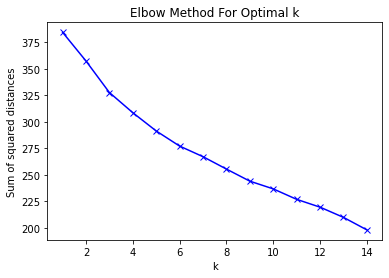

In [100]:
 #Elbow plot
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

- Run k-means clustering to generate the 7 clusters

In [ ]:
kclusters = 7
chapinero_grouped_clustering = chapinero_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chapinero_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# add latitude/longitude for each neighborhood
chapinero_merged = chapi.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neighbourhood')

#remove rows with NaN
chapinero_merged = chapinero_merged.dropna()
chapinero_merged.head()

#change cluster labels to integer
chapinero_merged.loc[:, 'Cluster Labels'] = chapinero_merged.loc[:, 'Cluster Labels'].astype('int') 

In [106]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chapinero_merged['latitude'], chapinero_merged['longitude'], chapinero_merged['neighbourhood'], chapinero_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [143]:
#subset only cluster labels and order
veggie = chapinero_merged[['Cluster Labels','neighbourhood','neighbourhood_ID','1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue']]


#rename
veggie.columns = ['Cluster', 'neighbourhood','neighbourhood_ID','1','2','3','4','5','6','7','8','9','10']

veggiemelt = pd.melt(veggie, id_vars=['Cluster','neighbourhood','neighbourhood_ID'])
veggiemelt

,Cluster,neighbourhood,neighbourhood_ID,variable,value
0,4,Pinar Alto - Pinar II,20056,1,Italian Restaurant
1,4,Chico Norte - Urb. La Gran Vía,20021,1,Café
2,4,Bosque Calderón Tejada III Sector,20009,1,Restaurant
3,4,Desarrollo Metropolitan Club,20026,1,Scenic Lookout
4,4,Urb. Belmonte,20108,1,Hotel
5,4,S.C. Quinta Camacho,20087,1,Coffee Shop
6,4,Chico Norte - Urb. Conjunto de la Cien,20020,1,Café
7,4,S.C. Chico Norte,20063,1,Hotel
8,4,El Retiro - Villa Andina,20031,1,Italian Restaurant
9,4,S.C. El Chico,20066,1,Hotel


In [190]:
#Since only cluster 4 has vegetarian restaurants, remove other clusters from  data
cluster4 = chapinero_merged[chapinero_merged['Cluster Labels']==4]

#Leave only neighborhoods in which vegetarian restaurants are in the top 10 caterogies, which shows interest
animallovers = cluster4[cluster4.set_index(['neighbourhood']).index.isin(realveggie.set_index(['neighbourhood']).index)]
animallovers

,borough,neighbourhood_ID,neighbourhood,longitude,latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4675,CHAPINERO,20009,Bosque Calderón Tejada III Sector,-74.058127,4.643231,4,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Beer Bar,Latin American Restaurant,Bakery,Japanese Restaurant,Mediterranean Restaurant,Burger Joint,Brewery
4743,CHAPINERO,20087,S.C. Quinta Camacho,-74.059584,4.654787,4,Coffee Shop,Restaurant,Latin American Restaurant,Burger Joint,Juice Bar,Sandwich Place,Hotel,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop
4913,CHAPINERO,20115,Vista Hermosa - Maria Cristina,-74.055112,4.643116,4,Tea Room,Breakfast Spot,Mountain,Vegetarian / Vegan Restaurant,Trail,Pet Store,Café,Yoga Studio,Furniture / Home Store,Fried Chicken Joint
5151,CHAPINERO,20100,Siberia - Castillo Calderón Tejada,-74.056906,4.638949,4,Mediterranean Restaurant,Hot Dog Joint,Burger Joint,Beer Bar,Vegetarian / Vegan Restaurant,Latin American Restaurant,French Restaurant,Park,Food Court,Gaming Cafe
5168,CHAPINERO,20046,Los Olivos,-74.055019,4.644382,4,BBQ Joint,Japanese Restaurant,Trail,Pet Store,Café,Breakfast Spot,Tea Room,Theme Restaurant,Mountain,Vegetarian / Vegan Restaurant
5185,CHAPINERO,20002,Altos de la Salle,-74.055681,4.645510,4,Japanese Restaurant,BBQ Joint,Bakery,Café,Vegetarian / Vegan Restaurant,Herbs & Spices Store,Mexican Restaurant,Italian Restaurant,Ice Cream Shop,Hostel
5236,CHAPINERO,20099,Siberia - Bosque Calderón Tejada,-74.057722,4.638848,4,Ice Cream Shop,Vegetarian / Vegan Restaurant,Burger Joint,Beer Bar,French Restaurant,Lounge,Latin American Restaurant,Mediterranean Restaurant,Hot Dog Joint,Electronics Store
5338,CHAPINERO,20077,S.C. La Salle,-74.059023,4.644736,4,Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Arepa Restaurant,Caribbean Restaurant,Café,Italian Restaurant,Bakery,BBQ Joint,Brewery
5678,CHAPINERO,20062,S.C. Chapinero Norte,-74.061635,4.650635,4,Soccer Field,Italian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Pizza Place,Latin American Restaurant,Nightclub,Caribbean Restaurant,Bistro,Bed & Breakfast
5780,CHAPINERO,20101,Siberia - El Capricho (Predio),-74.057459,4.639204,4,Mediterranean Restaurant,Burger Joint,Hot Dog Joint,Café,Vegetarian / Vegan Restaurant,Latin American Restaurant,Beer Bar,Lounge,French Restaurant,Food Court


In [144]:
#Select only rows with Vegan/vegetarian options, to see in which clusters they can be found
realveggie = veggiemelt[veggiemelt.loc[:,"value"].isin(['Vegetarian / Vegan Restaurant'])]
realveggie

,Cluster,neighbourhood,neighbourhood_ID,variable,value
136,4,Siberia - Bosque Calderón Tejada,20099,2,Vegetarian / Vegan Restaurant
141,4,S.C. La Salle,20077,2,Vegetarian / Vegan Restaurant
206,4,Bosque Calderón Tejada III Sector,20009,3,Vegetarian / Vegan Restaurant
259,4,S.C. Chapinero Norte,20062,3,Vegetarian / Vegan Restaurant
321,4,Vista Hermosa - Maria Cristina,20115,4,Vegetarian / Vegan Restaurant
396,4,Ingemar - El Triángulo,20037,4,Vegetarian / Vegan Restaurant
437,4,Siberia - Castillo Calderón Tejada,20100,5,Vegetarian / Vegan Restaurant
439,4,Altos de la Salle,20002,5,Vegetarian / Vegan Restaurant
468,4,Siberia - El Capricho (Predio),20101,5,Vegetarian / Vegan Restaurant
493,4,La Portada_,20043,5,Vegetarian / Vegan Restaurant


# 4. **Results**

Chapinero is one of the four richest boroughs in Bogota (3.813.290 pesos, or 1000 USD). Out of those four boroughs, it is the one with the highest proportion of millenials (25% of the population). Within Chapinero, neighbourhoods can be optimally grouped into seven clusters, according to the venues found within these neighbourhoods. Out of these 7 clusters, only 1 cluster had vegan / vegetarian options: clusters 4. Cluster 4 had 5 neighbourhoods with vegetarian /vegan restaurants among its top ten venues. These are shown in the map below: 


In [188]:
#Map of possible neighbourhoods
# create map
possiblesite = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, borough, neighbourhood in zip(animallovers['latitude'], animallovers['longitude'], animallovers['borough'], animallovers['neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(possiblesite) 

possiblesite

# 5. **Discussion**

We know that people in the previous neighbourhoods are interested in vegetarian restaurants, as they have at least one vegetarian / vegan restaurant amongst their top 10 most common venues, so a new restaurant in any of these  neighbourhoods would get noticed. As for supply / demand, the best option is one where it is less common. In this sense, out of the top neighbourhoods, Los Olivos is the place where a vegetarian /vegan restaurant is least common, so it would be a good place to set one up. 

# 6. **Conclusion**

The best neighbourhood to place a vegetarian restaurant in Bogota, Colombia, is in the "Los Olivos" neighourhood (-74.055019,4.644382), within the Chapinero borough. This is because Chapinero is the richest borough in Bogota, so people are more likely to go out to restaurants, because it has the highest proportion of millenials compared to other boroughs, and because vegetarian restaurants are popular in the cluster it is found. Additionaly, though they are popular, they are in tenth place, among the most popular venues on FourSquare, so there is not a large offer of this type of restaurant. 
